# Molecular system

## With OpenMM

```python
import openmm as mm
import openmm.app as app
import openmm.unit as unit
import numpy as np

# Parameters

n_particles = 1
mass = 32.0 * unit.amu
Eo=3.0 * unit.kilocalories_per_mole
a=5.0 * unit.angstroms
b=0.0 * unit.kilocalories_per_mole
k=1.0 * unit.kilocalories_per_mole/unit.angstrom**2

# OpenMM topology

topology = app.Topology()

dummy_element = app.Element(0, 'DUM', 'DUM', 0.0 * unit.amu)

chain = topology.addChain('A')
for ii in range(n_particles):
    residue = topology.addResidue('DUM', chain)
    atom = topology.addAtom(name='DUM', element= dummy_element, residue=residue)

# OpenMM system

system = mm.System()

for _ in range(n_particles):
    self.system.addParticle(dummy_element.mass)

A = Eo/(a**4)
B = -2.0*Eo/(a**2)
C = -b/a
D = k/2.0

force = mm.CustomExternalForce('A*x^4+B*x^2+C*x + D*(y^2+z^2)')
force.addGlobalParameter('A', A)
force.addGlobalParameter('B', B)
force.addGlobalParameter('C', C)
force.addGlobalParameter('D', D)

for ii in range(n_particles):
    force.addParticle(ii, [])
_ = self.system.addForce(force)
```

## With this library

This test system is fully documented in [DoubleWell class API](../api/_autosummary/uibcdf_test_systems.DoubleWell.html). Let's see an example of how to interact with it:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from openmm import unit

from uibcdf_systems import DoubleWell

molecular_system = DoubleWell(n_particles = 1, mass = 64 * unit.amu,
                              Eo=3.0 * unit.kilocalories_per_mole,
                              a=5.0 * unit.angstroms, b=0.0 * unit.kilocalories_per_mole,
                              k=1.0 * unit.kilocalories_per_mole/unit.angstrom**2)

The potential expression and the value of the parameters are stored in `potential`:

In [2]:
molecular_system.potential_expression

Eo*(-2.0*x**2/a**2 + x**4/a**4) + 0.5*k*(y**2 + z**2) - b*x/a

In [3]:
molecular_system.parameters

{'n_particles': 1,
 'mass': Quantity(value=64, unit=dalton),
 'Eo': Quantity(value=3.0, unit=kilocalorie/mole),
 'a': Quantity(value=5.0, unit=angstrom),
 'b': Quantity(value=0.0, unit=kilocalorie/mole),
 'k': Quantity(value=1.0, unit=kilocalorie/(angstrom**2*mole))}

And there is a method to evaluate the potential at a given positions:

In [4]:
molecular_system.evaluate_potential([-1.5, 0.0, 0.0] * unit.nanometers)

Quantity(value=189.0000000000001, unit=kilocalorie/mole)

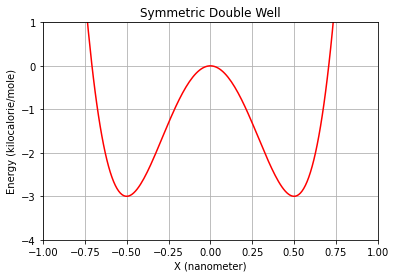

In [5]:
position = np.zeros((200,3), dtype=float) * unit.nanometers
position[:,0] = np.linspace(-1., 1., 200) * unit.nanometers

plt.plot(position[:,0], molecular_system.evaluate_potential(position) , 'r-')
plt.ylim(-4,1)
plt.xlim(-1,1)
plt.grid()
plt.xlabel("X ({})".format(unit.nanometers))
plt.ylabel("Energy ({})".format(unit.kilocalories_per_mole))
plt.title("Symmetric Double Well")
plt.show()

And the system to be used with OpenMM is accesible as:

In [6]:
molecular_system.system

<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x7f55e8bcbcc0> >

In [7]:
molecular_system.get_coordinates_minima()

[Quantity(value=array([-0.5,  0. ,  0. ]), unit=nanometer),
 Quantity(value=array([0.5, 0. , 0. ]), unit=nanometer)]

In [8]:
molecular_system.get_coordinates_maximum()

[Quantity(value=array([0., 0., 0.]), unit=nanometer)]

In [9]:
molecular_system.get_small_oscillations_time_periods_around_minima()

([Quantity(value=array([-0.5,  0. ,  0. ]), unit=nanometer),
  Quantity(value=array([0.5, 0. , 0. ]), unit=nanometer)],
 [Quantity(value=array([2.50806277, 2.45738961, 2.45738961]), unit=picosecond),
  Quantity(value=array([2.50806277, 2.45738961, 2.45738961]), unit=picosecond)])

In [10]:
molecular_system.get_harmonic_standard_deviations_around_minima(temperature=300*unit.kelvin)

([Quantity(value=array([-0.5,  0. ,  0. ]), unit=nanometer),
  Quantity(value=array([0.5, 0. , 0. ]), unit=nanometer)],
 [Quantity(value=array([0.07880364, 0.07721148, 0.07721148]), unit=nanometer),
  Quantity(value=array([0.07880364, 0.07721148, 0.07721148]), unit=nanometer)])